# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set
import lime_method
import target_parser


# The three models
import decision_tree
import random_forest_method
import svm_method_lime_compatible

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from target_parser.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb
Importing Jupyter notebook from multiscorer.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from lime_method.ipynb
Importing Jupyter notebook from svm_method_lime_compatible.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
import pandas_to_latex

In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)
undersampled_data

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,14-01-2019 15:47:00,8.400001,12.6,20.270000,336.0,2163.0,26.0,37.0,26.0,8.0,...,42.0,16.0,25.0,7.0,28.0,32.0,72.0,7.90,344.399994,Other
1,15-12-2018 08:05:00,-1.100000,5.6,11.969999,171.0,0.0,10.0,27.0,19.0,11.0,...,72.0,27.0,47.0,-4.0,5.0,28.0,18.0,12.70,169.899994,Status_9_Substatus_8
2,15-11-2018 18:07:30,1.200000,3.6,9.730000,145.0,0.0,26.0,33.0,30.0,29.0,...,50.0,40.0,40.0,12.0,17.0,22.0,38.0,1.00,146.199997,Status_9_Substatus_8
3,04-05-2019 03:13:30,-10.400001,13.3,19.910000,340.0,1792.0,22.0,35.0,30.0,16.0,...,53.0,24.0,48.0,3.0,15.0,19.0,37.0,1.00,329.600006,Other
4,07-04-2018 23:03:00,0.800000,2.5,6.500000,130.0,5.0,14.0,22.0,20.0,17.0,...,25.0,24.0,27.0,2.0,8.0,15.0,28.0,6.00,130.800003,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533144,18-06-2019 05:48:30,-40.000000,5.1,6.860000,191.0,7.0,25.0,31.0,31.0,33.0,...,46.0,38.0,45.0,13.0,18.0,22.0,37.0,5.00,151.000000,Other
533145,26-06-2019 21:20:00,2.600000,7.7,15.380000,246.0,527.0,26.0,38.0,35.0,23.0,...,47.0,34.0,47.0,9.0,21.0,25.0,42.0,1.00,248.600006,Other
533146,22-02-2019 09:14:30,-25.500000,12.5,12.110000,195.0,0.0,10.0,15.0,17.0,16.0,...,73.0,28.0,45.0,7.0,11.0,14.0,28.0,22.52,169.500000,Status_9_Substatus_8
533147,03-12-2018 09:36:00,-22.400000,4.9,8.429999,128.0,58.0,19.0,27.0,24.0,19.0,...,53.0,30.0,32.0,5.0,10.0,17.0,33.0,1.00,105.599998,Other


In [4]:
'''
# Sorting the values:
#undersampled_data.sort_values(by=['TimeStamp'])
pd.to_datetime(undersampled_data['TimeStamp'], format="%d-%m-%Y %H:%M:%S")
undersampled_data = undersampled_data.sort_values(by=['TimeStamp'])
'''

'\n# Sorting the values:\n#undersampled_data.sort_values(by=[\'TimeStamp\'])\npd.to_datetime(undersampled_data[\'TimeStamp\'], format="%d-%m-%Y %H:%M:%S")\nundersampled_data = undersampled_data.sort_values(by=[\'TimeStamp\'])\n'

In [5]:
undersampled_data

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,14-01-2019 15:47:00,8.400001,12.6,20.270000,336.0,2163.0,26.0,37.0,26.0,8.0,...,42.0,16.0,25.0,7.0,28.0,32.0,72.0,7.90,344.399994,Other
1,15-12-2018 08:05:00,-1.100000,5.6,11.969999,171.0,0.0,10.0,27.0,19.0,11.0,...,72.0,27.0,47.0,-4.0,5.0,28.0,18.0,12.70,169.899994,Status_9_Substatus_8
2,15-11-2018 18:07:30,1.200000,3.6,9.730000,145.0,0.0,26.0,33.0,30.0,29.0,...,50.0,40.0,40.0,12.0,17.0,22.0,38.0,1.00,146.199997,Status_9_Substatus_8
3,04-05-2019 03:13:30,-10.400001,13.3,19.910000,340.0,1792.0,22.0,35.0,30.0,16.0,...,53.0,24.0,48.0,3.0,15.0,19.0,37.0,1.00,329.600006,Other
4,07-04-2018 23:03:00,0.800000,2.5,6.500000,130.0,5.0,14.0,22.0,20.0,17.0,...,25.0,24.0,27.0,2.0,8.0,15.0,28.0,6.00,130.800003,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533144,18-06-2019 05:48:30,-40.000000,5.1,6.860000,191.0,7.0,25.0,31.0,31.0,33.0,...,46.0,38.0,45.0,13.0,18.0,22.0,37.0,5.00,151.000000,Other
533145,26-06-2019 21:20:00,2.600000,7.7,15.380000,246.0,527.0,26.0,38.0,35.0,23.0,...,47.0,34.0,47.0,9.0,21.0,25.0,42.0,1.00,248.600006,Other
533146,22-02-2019 09:14:30,-25.500000,12.5,12.110000,195.0,0.0,10.0,15.0,17.0,16.0,...,73.0,28.0,45.0,7.0,11.0,14.0,28.0,22.52,169.500000,Status_9_Substatus_8
533147,03-12-2018 09:36:00,-22.400000,4.9,8.429999,128.0,58.0,19.0,27.0,24.0,19.0,...,53.0,30.0,32.0,5.0,10.0,17.0,33.0,1.00,105.599998,Other


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [6]:
'''undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")
'''


'undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")\n'

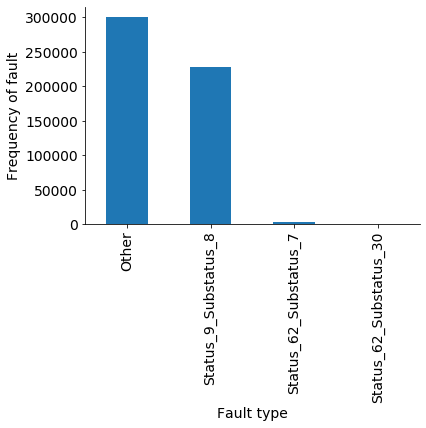

<Figure size 1440x1152 with 0 Axes>

In [7]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [8]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,14-01-2019 15:47:00,8.400001,12.6,20.270000,336.0,2163.0,26.0,37.0,26.0,8.0,...,42.0,16.0,25.0,7.0,28.0,32.0,72.0,7.9,344.399994,Other
1,15-12-2018 08:05:00,-1.100000,5.6,11.969999,171.0,0.0,10.0,27.0,19.0,11.0,...,72.0,27.0,47.0,-4.0,5.0,28.0,18.0,12.7,169.899994,Status_9_Substatus_8
2,15-11-2018 18:07:30,1.200000,3.6,9.730000,145.0,0.0,26.0,33.0,30.0,29.0,...,50.0,40.0,40.0,12.0,17.0,22.0,38.0,1.0,146.199997,Status_9_Substatus_8
3,04-05-2019 03:13:30,-10.400001,13.3,19.910000,340.0,1792.0,22.0,35.0,30.0,16.0,...,53.0,24.0,48.0,3.0,15.0,19.0,37.0,1.0,329.600006,Other
4,07-04-2018 23:03:00,0.800000,2.5,6.500000,130.0,5.0,14.0,22.0,20.0,17.0,...,25.0,24.0,27.0,2.0,8.0,15.0,28.0,6.0,130.800003,Other


In [9]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(533149,)

In [10]:
y.value_counts()

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64

### Translate statues codes to int for easier comparison

In [11]:
y_codes = target_parser.status_to_code(y)
print(np.asarray(np.unique(y_codes, return_counts=True)).T)

[[     0 300000]
 [     1 228668]
 [     2   4098]
 [     3    383]]


## SMOTE (BEFORE RANDOM FOREST)

In [12]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X_smote.shape)
print(y_smote.shape)
print(pd.Series(y_smote).value_counts())
'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

(533149, 34)
(533149,)
(1200000, 34)
(1200000,)
Status_62_Substatus_30    300000
Status_9_Substatus_8      300000
Status_62_Substatus_7     300000
Other                     300000
dtype: int64


'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &         Other \\
\midrule
         Precision &                                0.916833 &                                         0.952517 &                      0.997909 &      0.999666 \\
            Recall &                                0.994386 &                                         0.877328 &                      0.999860 &      0.997120 \\
          F1-score &                                0.931351 &                                         0.934368 &                      0.998299 &      0.999156 \\
           Support &                              409.800000 &                                        38.300000 &                  22866.800000 &  30000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[9.94387506e-01 0.00000000e

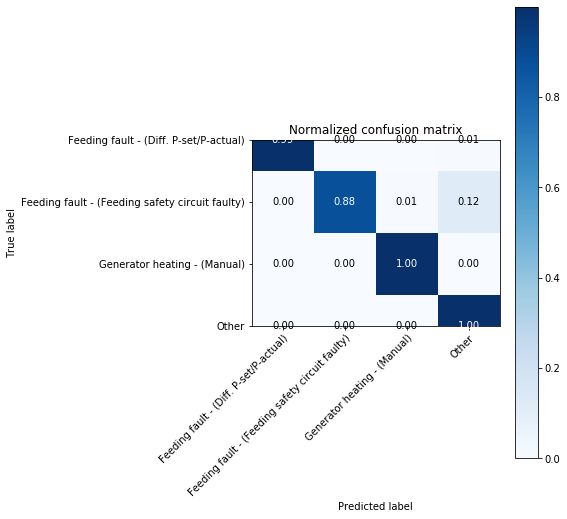

Total Accuracy 		0.998

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.917 		 0.994 		 0.954
Feeding fault - (Feeding safety circuit faulty)  0.952 		 0.877 		 0.913
Generator heating - (Manual)                     0.998 		 1.000 		 0.999
Other                                            1.000 		 0.997 		 0.998


In [13]:


from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)
# df_rf, y_true, y_pred,rf_performance = performance_measure.times_series_split(rf,X,y,smote=True,convertStatus=True)


# Smote is on the cross validation

df_rf, y_true, y_pred,rf_performance = performance_measure.cross_validate_model(rf,X,y,smote=True,convertStatus=True)
performance_measure.confusion_matrix(y_true,y_pred)


rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
performance_measure.plot_confusion_matrix(y_true,y_pred,normalize=True,convertStatus=True,name='RF')
performance_measure.get_performance_measures(y_true, y_pred,convertStatus=True)


In [14]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.083912 \\
   0.068417 \\
   0.063107 \\
   0.058943 \\
   0.045580 \\
\bottomrule
\end{tabular}



In [15]:
rf_performance

,Performance metric,Feeding fault - (Diff. P-set/P-actual),Feeding fault - (Feeding safety circuit faulty),Generator heating - (Manual),Other
0,Precision,0.916833,0.952517,0.997909,0.999666
1,Recall,0.994386,0.877328,0.999860,0.997120
2,F1-score,0.931351,0.934368,0.998299,0.999156
3,Support,409.800000,38.300000,22866.800000,30000.000000


## SVM

### Split data for LIME

In [16]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Other                     99001
Status_9_Substatus_8      75461
Status_62_Substatus_7      1352
Status_62_Substatus_30      126
Name: Status, dtype: int64

### Translate y status codes to ints for lime compatibility

In [17]:
y_train_codes = target_parser.status_to_code(y_train)
y_test_codes  = target_parser.status_to_code(y_test)

print('Counted y_train_codes:')
print(np.asarray(np.unique(y_train_codes, return_counts=True)).T)
print('\nCounted y_test_codes:')
print(np.asarray(np.unique(y_test_codes, return_counts=True)).T)


Counted y_train_codes:
[[     0 200999]
 [     1 153207]
 [     2   2746]
 [     3    257]]

Counted y_test_codes:
[[    0 99001]
 [    1 75461]
 [    2  1352]
 [    3   126]]


### Scale data set for SVM

In [18]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole_smote.fit_transform(X_smote)
print(X_scaled_oversampled.shape)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_for_data)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_for_data)
X_train_scaled.head()

(1200000, 34)
(357209, 34)
(175940, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.131899,0.397531,0.000000,0.763231,0.000000,0.271605,0.135484,0.149351,0.355556,0.359551,...,0.063158,0.098901,0.107692,0.191489,0.188679,0.329412,0.310345,0.307692,0.964793,0.585347
1,0.484008,0.187654,0.613502,0.718663,0.174111,0.604938,0.380645,0.376623,0.577778,0.584270,...,0.610526,0.615385,0.584615,0.521277,0.452830,0.541176,0.431034,0.453846,0.000000,0.794897
2,0.530994,0.054321,0.367089,0.417827,0.000000,0.345679,0.219355,0.233766,0.411111,0.426966,...,0.168421,0.186813,0.338462,0.191489,0.245283,0.329412,0.258621,0.315385,0.000000,0.618210
3,0.524767,0.185185,0.508861,0.509749,0.000000,0.493827,0.335484,0.318182,0.522222,0.539326,...,0.863158,0.923077,0.569231,0.521277,0.433962,0.447059,0.293103,0.369231,0.159385,0.677750
4,0.519672,0.118519,0.500422,0.392758,0.096774,0.555556,0.361290,0.357143,0.544444,0.550562,...,0.705263,0.725275,0.584615,0.425532,0.320755,0.447059,0.327586,0.423077,0.000000,0.593079


In [19]:
print(y.shape)
print(X_smote.shape)
print(X_scaled_oversampled.shape)
print(y_smote.shape)

(533149,)
(1200000, 34)
(1200000, 34)
(1200000,)


In [20]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.397531 &    0.000000 &          0.763231 &     0.000000 &             0.271605 &  ... \\
  0.187654 &    0.613502 &          0.718663 &     0.174111 &             0.604938 &  ... \\
  0.054321 &    0.367089 &          0.417827 &     0.000000 &             0.345679 &  ... \\
  0.185185 &    0.508861 &          0.509749 &     0.000000 &             0.493827 &  ... \\
  0.118519 &    0.500422 &          0.392758 &     0.096774 &             0.555556 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)
X_train_scaled_smote = pd.DataFrame(X_train_scaled_smote, columns=columns_for_data)


In [22]:
X_train_scaled_smote

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.131899,0.397531,0.000000,0.763231,0.000000,0.271605,0.135484,0.149351,0.355556,0.359551,...,0.063158,0.098901,0.107692,0.191489,0.188679,0.329412,0.310345,0.307692,0.964793,0.585347
1,0.484008,0.187654,0.613502,0.718663,0.174111,0.604938,0.380645,0.376623,0.577778,0.584270,...,0.610526,0.615385,0.584615,0.521277,0.452830,0.541176,0.431034,0.453846,0.000000,0.794897
2,0.530994,0.054321,0.367089,0.417827,0.000000,0.345679,0.219355,0.233766,0.411111,0.426966,...,0.168421,0.186813,0.338462,0.191489,0.245283,0.329412,0.258621,0.315385,0.000000,0.618210
3,0.524767,0.185185,0.508861,0.509749,0.000000,0.493827,0.335484,0.318182,0.522222,0.539326,...,0.863158,0.923077,0.569231,0.521277,0.433962,0.447059,0.293103,0.369231,0.159385,0.677750
4,0.519672,0.118519,0.500422,0.392758,0.096774,0.555556,0.361290,0.357143,0.544444,0.550562,...,0.705263,0.725275,0.584615,0.425532,0.320755,0.447059,0.327586,0.423077,0.000000,0.593079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803991,0.485955,0.192800,0.663329,0.387187,0.242311,0.432099,0.334302,0.337662,0.455556,0.471910,...,0.684211,0.461538,0.400000,0.466136,0.283019,0.423529,0.289944,0.392308,0.000000,0.566186
803992,0.505802,0.241975,0.504641,0.278552,0.000000,0.629630,0.400000,0.363636,0.655556,0.662921,...,0.863158,0.901099,0.723077,0.510638,0.622642,0.600000,0.534483,0.461538,0.200106,0.504350
803993,0.487688,0.249383,0.817722,0.844011,0.564516,0.580247,0.400000,0.376623,0.544444,0.561798,...,0.631579,0.560440,0.523077,0.500000,0.452830,0.517647,0.396552,0.446154,0.000000,0.884400
803994,0.490657,0.032361,0.160274,0.885794,0.000000,0.370370,0.258065,0.233766,0.455556,0.471910,...,0.189474,0.208791,0.338462,0.180851,0.245283,0.341176,0.465517,0.276923,0.000000,0.915424


### Translate y status codes to ints for lime compatibility

In [23]:
y_train_smote_codes = target_parser.status_to_code(y_train_smote)
print(np.asarray(np.unique(y_train_smote_codes, return_counts=True)).T)

[[     0 200999]
 [     1 200999]
 [     2 200999]
 [     3 200999]]


## SVM method

In [24]:
from sklearn.svm import SVC

### BALANCED SVM

In [ ]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced,l = performance_measure.cross_validate_model(svm_balanced,X_scaled,y,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True,convertStatus=True,name='SVM_class_weight_balanced')
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_balanced, y_pred_svm_balanced,convertStatus=True)
# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

In [ ]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced ,l= performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True,convertStatus=True, name='SVM_unbalanced')
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_unbalanced, y_pred_svm_unbalanced,convertStatus=True)
# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm_unbalanced_smote = SVC(kernel='rbf', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote, svm_smote_performance = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True,convertStatus=True,name='SVM_unbalanced_and_smote')
performance_measure.get_performance_measures(y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote,convertStatus=True)
# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())


In [ ]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote,l = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True,convertStatus=True,name='SVM_class_weight_balanced_and_smote')
performance_measure.get_performance_measures(y_true_svm_balanced_smote, y_pred_svm_balanced_smote,convertStatus=True)
# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and probability

In [ ]:
svm_prob_smote = svm_method_lime_compatible.get_svm_model_balanced_with_prob(X_train_scaled_smote, 
                                                                             X_test_scaled, 
                                                                             y_train_smote_codes, 
                                                                             y_test_codes,
                                                                             convertCode=True,
                                                                             name='SVM_probability_limeCompatible_unbalanced_smote')

#### Run Lime Metod on 

In [ ]:
svm_prob_smote.classes_

In [ ]:
targetNames = svm_prob_smote.classes_
explainer = lime_method.run_lime(X_train_scaled_smote, targetNames)
exp_instance = lime_method.explain_instance(X_test_scaled, svm_prob_smote, explainer, 2)
exp_instance.show_in_notebook(show_table=True) #, show_all=True)

## Decision tree model

### Remove the features from the random forest model called rf


In [ ]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

### Convert the selected DT variables to LATEX

In [ ]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)

In [ ]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

### Evaluate Decision tree model

#### Setting depth for tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

In [ ]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt,dt_performance = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True,convertStatus=True,name='DT')
performance_measure.get_performance_measures(y_true_dt, y_pred_dt,convertStatus=True)


In [ ]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

In [ ]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

### Training the DT

In [ ]:
# Train DT on these features and print it out:

clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = 2)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))
    

In [ ]:
save_tree(clf_df,"depth2_new")
# save_tree(dt_depth3,"depth3")

In [ ]:
import matplotlib as mpl
import matplotlib
import seaborn as sns
colorname=[]
colorid=[]
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

performances_all = [dt_performance,rf_performance,svm_smote_performance]


#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(8,18))
# fig, ax = plt.subplots(1, 1,figsize=(12,8))
# plt.subplots_adjust(top = 0.9)
d={1:ax1,2:ax2,3:ax3,4:ax4}

# fig.suptitle('Sharing x per column, y per row')

# Plotting each of the 4 subplots in loop
for column in range(1,5):
    fig, ax = plt.subplots()

    index = 0
    plot_df = pd.DataFrame(np.zeros((3, 3)), columns = ["Precision","Recall","F1-score"])
    
    # print("column", column)
    
    for p in performances_all:
        for i in range(0,3):
            s = p.iloc[i,column]
            plot_df.iat[index,i] = s
        index += 1

    
    plot_df = plot_df.set_index([pd.Index(['Decision Tree','Random Forest','SVM with SMOTE'])])


    errors = ['Feeding fault - (Diff. P-set/P-actual)','Feeding fault - (Feeding safety circuit faulty)','Generator heating - (Manual)	','Other']
    # Plotting
    # ax = d.get(column)
    # fig, ax = plt.subplots(1, 1, figsize=(8,4))

    ax.set_ylabel("Score",fontsize=16)
    ax.set_title(errors[column-1],fontsize=18)
    
    sns.set_style("whitegrid")
    sns.despine(left=True)

    labels = ['Decision Tree','Random Forest','SVM with SMOTE']
    ax.grid(False)
    # Color
    cmap = mpl.cm.GnBu(np.linspace(0,1,20))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    
    import pylab as plot
    params = {'legend.fontsize':12}
    plot.rcParams.update(params)
    
    chart = plot_df.plot.bar(ax=ax,width=0.5,stacked = False,fontsize = 11)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize = 14)
    ax.grid(axis='x')
    fig.tight_layout()
    plt.savefig('../Data_Plots/comparing_results/comparing_results{}.eps'.format(column),format='eps')

# plt.savefig(f'../Data_Plots/comparing_results/comparing_results')

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper right',fontsize = 18)
    # 'seagreen','darkturquoise', 'steelblue'))



In [ ]:
viridis = mpl.cm.get_cmap('viridis', 3)
print(viridis.colors)